# Credit Risk scoring Project

Getting the data

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('https://github.com/gastonstat/CreditScoring/raw/master/CreditScoring.csv')

In [3]:
data

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4450,2,1,1,60,39,2,1,1,69,92,0,0,900,1020
4451,1,22,2,60,46,2,1,1,60,75,3000,600,950,1263
4452,2,0,2,24,37,2,1,2,60,90,3500,0,500,963
4453,1,0,1,48,23,1,1,3,49,140,0,0,550,550


# 6.2 Data cleaning and preparation

In [4]:
data.columns = data.columns.str.lower()

In [5]:
data.status.value_counts()

status
1    3200
2    1254
0       1
Name: count, dtype: int64

In [6]:
data.status = data.status.map({1 : 'ok', 2: 'default' , 0: 'unknown'})

In [7]:
data.home.value_counts()

home
2    2107
1     973
5     783
6     319
3     247
4      20
0       6
Name: count, dtype: int64

In [8]:
home_values = {
    1: 'rent',
    2: 'owner',
    3: 'private',
    4: 'ignore',
    5: 'parents',
    6: 'other',
    0: 'unk'
}
data.home = data.home.map(home_values)

In [9]:
data.marital.value_counts()

marital
2    3241
1     978
4     130
3      67
5      38
0       1
Name: count, dtype: int64

In [10]:
martial_values = {
    1: 'single',
    2: 'married',
    3: 'widow',
    4: 'separated',
    5: 'divorced',
    0: 'unk'
}
data.marital = data.marital.map(martial_values)

In [11]:
data.records.value_counts()

records
1    3682
2     773
Name: count, dtype: int64

In [12]:
record_values = {
    1: 'no',
    2: 'yes',
    3: 'unk'
}
data.records = data.records.map(record_values)

In [13]:
data.job.value_counts()

job
1    2806
3    1024
2     452
4     171
0       2
Name: count, dtype: int64

In [14]:
job_values = {
    1: 'fixed',
    2: 'partime',
    3: 'freelance',
    4: 'others',
    0: 'unk'
}
data.job = data.job.map(job_values)

In [15]:
data.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129,0,0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107,0,0,310,910


In [16]:
data.describe().round(2)

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.00,4455.00,4455.00,4455.00,4455.00,4455.00,4455.00,4455.00,4455.00
mean,7.99,46.44,37.08,55.57,763316.99,1060340.81,404381.96,1039.02,1462.88
std,8.17,14.66,10.98,19.52,8703625.26,10217568.67,6344253.40,474.54,628.09
min,0.00,6.00,18.00,35.00,0.00,0.00,0.00,100.00,105.00
25%,2.00,36.00,28.00,35.00,80.00,0.00,0.00,700.00,1117.50
50%,5.00,48.00,36.00,51.00,120.00,3500.00,0.00,1000.00,1400.00
75%,12.00,60.00,45.00,72.00,166.00,6000.00,0.00,1300.00,1692.00
max,48.00,72.00,68.00,180.00,99999999.00,99999999.00,99999999.00,5000.00,11140.00


In [17]:
for c in ['income' , 'assets' , 'debt']:
    data[c] = data[c].replace( to_replace = 99999999 , value=np.nan)

In [18]:
data.status.value_counts()

status
ok         3200
default    1254
unknown       1
Name: count, dtype: int64

In [19]:
data = data[data.status != 'unknown'].reset_index(drop=True)

In [20]:
from sklearn.model_selection import train_test_split
full_train_data , test_data = train_test_split( data , test_size=0.2 , random_state=11 )
train_data , valid_data = train_test_split( full_train_data , test_size=0.25 , random_state=11 )

In [21]:
train_data.shape , valid_data.shape , test_data.shape

((2672, 14), (891, 14), (891, 14))

In [22]:
train_data = train_data.reset_index(drop=True)
valid_data = valid_data.reset_index(drop=True)
test_data = test_data.reset_index(drop=True)

In [23]:
y_train = (train_data.status == 'default').astype(int).values
y_test = (test_data.status == 'default').astype(int).values
y_valid = (valid_data.status == 'default').astype(int).values

In [24]:
y_train

array([1, 1, 0, ..., 0, 0, 0], shape=(2672,))

In [25]:
del train_data['status']
del valid_data['status']
del test_data['status']

In [26]:
train_data.columns

Index(['seniority', 'home', 'time', 'age', 'marital', 'records', 'job',
       'expenses', 'income', 'assets', 'debt', 'amount', 'price'],
      dtype='object')

# 6.3 Decision trees <br>
Decision Trees are powerful algorithms, capable of fitting complex datasets. The decision trees make predictions based on the bunch of if/else statements by splitting a node into two or more sub-nodes.<br>

With versatility, the decision tree is also prone to overfitting. One of the reasons why this algorithm often overfits is its depth. It tends to memorize all the patterns in the train data but struggles to perform well on the unseen data (validation or test set).<br>

To overcome the overfitting problem, we can reduce the complexity of the algorithm by reducing the depth size.<br>

A decision tree with a depth of 1 is called decision stump and has only one split from the root.<br>

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score

In [28]:
train_dicts = train_data.fillna(0).to_dict(orient='records')
val_dicts = valid_data.fillna(0).to_dict(orient='records')
test_dicts = test_data.fillna(0).to_dict(orient='records')
train_dicts

[{'seniority': 10,
  'home': 'owner',
  'time': 36,
  'age': 36,
  'marital': 'married',
  'records': 'no',
  'job': 'freelance',
  'expenses': 75,
  'income': 0.0,
  'assets': 10000.0,
  'debt': 0.0,
  'amount': 1000,
  'price': 1400},
 {'seniority': 6,
  'home': 'parents',
  'time': 48,
  'age': 32,
  'marital': 'single',
  'records': 'yes',
  'job': 'fixed',
  'expenses': 35,
  'income': 85.0,
  'assets': 0.0,
  'debt': 0.0,
  'amount': 1100,
  'price': 1330},
 {'seniority': 1,
  'home': 'parents',
  'time': 48,
  'age': 40,
  'marital': 'married',
  'records': 'no',
  'job': 'fixed',
  'expenses': 75,
  'income': 121.0,
  'assets': 0.0,
  'debt': 0.0,
  'amount': 1320,
  'price': 1600},
 {'seniority': 1,
  'home': 'parents',
  'time': 48,
  'age': 23,
  'marital': 'single',
  'records': 'no',
  'job': 'partime',
  'expenses': 35,
  'income': 72.0,
  'assets': 0.0,
  'debt': 0.0,
  'amount': 1078,
  'price': 1079},
 {'seniority': 5,
  'home': 'owner',
  'time': 36,
  'age': 46,
  'm

In [29]:
dv  = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)
X_valid = dv.transform(val_dicts)
X_test = dv.transform(test_dicts)

In [30]:
dt = DecisionTreeClassifier()


In [31]:
dt.fit(X_train , y_train)

DecisionTreeClassifier()

In [32]:
y_pred = dt.predict_proba(X_valid)[:, 1]
y_pred

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0.,
       0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0.,
       0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0.,
       1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0.,
       0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 1., 1., 0.

In [33]:
X_train.shape, X_valid.shape, X_test.shape 

((2672, 29), (891, 29), (891, 29))

In [34]:
roc_auc_score(y_valid , y_pred)

np.float64(0.6637281732096583)

In [35]:
y_pred = dt.predict_proba(X_train)[:,1]

In [36]:
roc_auc_score(y_train , y_pred)

np.float64(1.0)

In [37]:
det = DecisionTreeClassifier(max_depth=15)
det.fit(X_train , y_train)

DecisionTreeClassifier(max_depth=15)

In [38]:

y_pred = det.predict_proba(X_train)[:,1]
auc = roc_auc_score(y_train , y_pred)
print(f"train :  {auc}")

y_pred = det.predict_proba(X_valid)[:,1]
auc = roc_auc_score(y_valid , y_pred)
print(f"train :  {auc}")


train :  0.9984571291758211
train :  0.6640732847351724


In [39]:
from sklearn.tree import export_text
r = export_text(det , feature_names=dv.get_feature_names_out().tolist())
print(r)

|--- records=yes <= 0.50
|   |--- job=partime <= 0.50
|   |   |--- income <= 74.50
|   |   |   |--- assets <= 4250.00
|   |   |   |   |--- income <= 20.00
|   |   |   |   |   |--- seniority <= 1.50
|   |   |   |   |   |   |--- home=parents <= 0.50
|   |   |   |   |   |   |   |--- seniority <= 0.50
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- seniority >  0.50
|   |   |   |   |   |   |   |   |--- price <= 1457.50
|   |   |   |   |   |   |   |   |   |--- expenses <= 55.00
|   |   |   |   |   |   |   |   |   |   |--- home=other <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |   |--- home=other >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- expenses >  55.00
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- price >  1457.50
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- h

# 6.4 Decision tree learning algorithm

# 6.5 Decision trees parameter tuning<br>
Selecting Max depth <br>
selecting min samples leaf

In [40]:
score = []
for d in [4,5,6]:
    for l in [1,2,3,4,5,10,15,20,25,30,35]:
        det = DecisionTreeClassifier(max_depth=d , min_samples_leaf=l )
        det.fit(X_train , y_train)

        y_pred = det.predict_proba(X_train)[:,1]
        auc_train = roc_auc_score(y_train , y_pred)
        score.append((d , l , auc_train))

        print(f"max_depth : {d} , min_samples_leaf : {l} => train_auc : {auc_train} ")

max_depth : 4 , min_samples_leaf : 1 => train_auc : 0.8164293560926146 
max_depth : 4 , min_samples_leaf : 2 => train_auc : 0.8164293560926146 
max_depth : 4 , min_samples_leaf : 3 => train_auc : 0.8164293560926146 
max_depth : 4 , min_samples_leaf : 4 => train_auc : 0.8164293560926146 
max_depth : 4 , min_samples_leaf : 5 => train_auc : 0.8164293560926146 
max_depth : 4 , min_samples_leaf : 10 => train_auc : 0.8164293560926146 
max_depth : 4 , min_samples_leaf : 15 => train_auc : 0.817233888231649 
max_depth : 4 , min_samples_leaf : 20 => train_auc : 0.816833206579911 
max_depth : 4 , min_samples_leaf : 25 => train_auc : 0.8156980592642668 
max_depth : 4 , min_samples_leaf : 30 => train_auc : 0.8150808405160272 
max_depth : 4 , min_samples_leaf : 35 => train_auc : 0.8113116866655399 
max_depth : 5 , min_samples_leaf : 1 => train_auc : 0.8433781899611289 
max_depth : 5 , min_samples_leaf : 2 => train_auc : 0.8433781899611289 
max_depth : 5 , min_samples_leaf : 3 => train_auc : 0.843378

In [41]:
df_score = pd.DataFrame(score , columns=['max_depth' , 'min_samples_leaf' , 'auc_train'])
df_score

,max_depth,min_samples_leaf,auc_train
0,4,1,0.816429
1,4,2,0.816429
2,4,3,0.816429
3,4,4,0.816429
4,4,5,0.816429
5,4,10,0.816429
6,4,15,0.817234
7,4,20,0.816833
8,4,25,0.815698
9,4,30,0.815081


In [42]:
df_score.sort_values(by='auc_train' , ascending=False)

,max_depth,min_samples_leaf,auc_train
22,6,1,0.874546
23,6,2,0.873663
26,6,5,0.873373
24,6,3,0.873080
25,6,4,0.871632
27,6,10,0.865779
28,6,15,0.861244
29,6,20,0.858795
30,6,25,0.856545
31,6,30,0.854138


In [43]:
df_score_pivot = df_score.pivot(index='min_samples_leaf' , columns=['max_depth'] , values=['auc_train'])
df_score_pivot

auc_train                    
max_depth                4         5         6
min_samples_leaf                              
1                 0.816429  0.843378  0.874546
2                 0.816429  0.843378  0.873663
3                 0.816429  0.843378  0.873080
4                 0.816429  0.843378  0.871632
5                 0.816429  0.843391  0.873373
10                0.816429  0.842725  0.865779
15                0.817234  0.840487  0.861244
20                0.816833  0.837485  0.858795
25                0.815698  0.837703  0.856545
30                0.815081  0.835940  0.854138
35                0.811312  0.830986  0.848900

<Axes: xlabel='None-max_depth', ylabel='min_samples_leaf'>

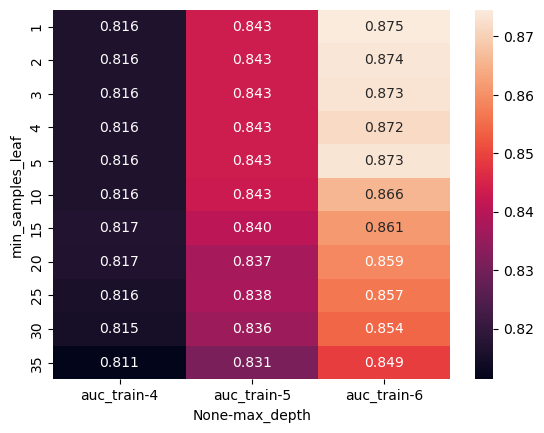

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df_score_pivot , annot=True , fmt=".3f")

In [45]:
from sklearn.ensemble import RandomForestClassifier


In [46]:
rf = RandomForestClassifier(n_estimators=10)
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10)

In [47]:
y_pred = rf.predict_proba(X_valid)[:,1]
roc_auc_score(y_valid , y_pred)

np.float64(0.7819409798745489)

In [48]:
score = []
for d in [5,10,15]:
    for n in range(10 , 201 ,10):
        rf = RandomForestClassifier(n_estimators=n , max_depth=d )
        rf.fit(X_train,y_train)

        y_pred = rf.predict_proba(X_train)[:,1]
        auc_train = roc_auc_score(y_train , y_pred)
        score.append((d, n , auc_train))

In [49]:
df_score_r = pd.DataFrame(score, columns=['max_depth','n_estimators', 'auc'])

In [50]:
df_score_r

,max_depth,n_estimators,auc
0,5,10,0.863926
1,5,20,0.864070
2,5,30,0.865725
3,5,40,0.873300
4,5,50,0.870263
5,5,60,0.874214
6,5,70,0.871965
7,5,80,0.872029
8,5,90,0.874211
9,5,100,0.874406


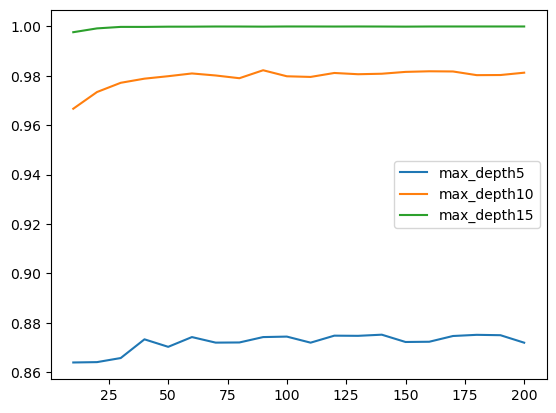

In [51]:
for d in [5,10,15]:
    df_sub = df_score_r[df_score_r.max_depth == d]
    plt.plot(df_sub.n_estimators, df_sub.auc, label='max_depth%d' % d)

plt.legend()

In [52]:
score_leaf = []
for s in [1,2,3,4,5,10,50]:
    for n in range(10 , 201 ,10):
        rf = RandomForestClassifier(n_estimators=n , max_depth=15, min_samples_leaf=s)
        rf.fit(X_train,y_train)

        y_pred = rf.predict_proba(X_train)[:,1]
        auc_train = roc_auc_score(y_train , y_pred)
        score_leaf.append((s , n , auc_train))

df_score_leaf = pd.DataFrame(score_leaf, columns=['min_samples_leaf','n_estimators', 'auc'])


In [53]:
df_score_leaf

,min_samples_leaf,n_estimators,auc
0,1,10,0.997461
1,1,20,0.999656
2,1,30,0.999854
3,1,40,0.999901
4,1,50,0.999833
...,...,...,...
135,50,160,0.859926
136,50,170,0.857049
137,50,180,0.860185
138,50,190,0.860888


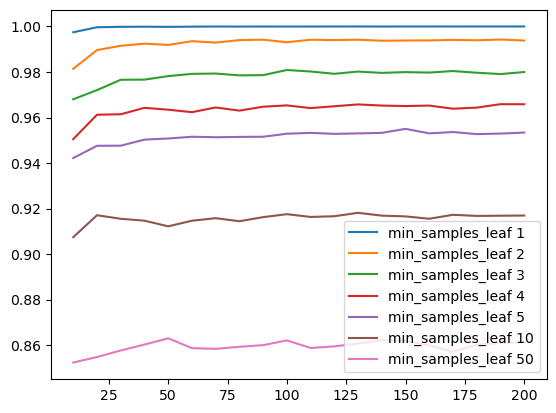

In [54]:
for d in [1,2,3,4,5,10,50]:
    df_sub = df_score_leaf[df_score_leaf.min_samples_leaf == d]
    plt.plot(df_sub.n_estimators, df_sub.auc, label='min_samples_leaf %d' % d)

plt.legend()

In [55]:
rf = RandomForestClassifier(n_estimators=200 , max_depth=15, min_samples_leaf=1)
rf.fit(X_train,y_train)


RandomForestClassifier(max_depth=15, n_estimators=200)

In [56]:
import xgboost as xgb
feature = dv.get_feature_names_out().tolist()
feature

['age',
 'amount',
 'assets',
 'debt',
 'expenses',
 'home=ignore',
 'home=other',
 'home=owner',
 'home=parents',
 'home=private',
 'home=rent',
 'home=unk',
 'income',
 'job=fixed',
 'job=freelance',
 'job=others',
 'job=partime',
 'job=unk',
 'marital=divorced',
 'marital=married',
 'marital=separated',
 'marital=single',
 'marital=unk',
 'marital=widow',
 'price',
 'records=no',
 'records=yes',
 'seniority',
 'time']

In [57]:
X_train.shape, X_valid.shape, X_test.shape

((2672, 29), (891, 29), (891, 29))

In [58]:
dtrain = xgb.DMatrix(X_train , label=y_train , feature_names=feature)
dvalid = xgb.DMatrix(X_valid , label=y_valid , feature_names=feature)

In [105]:
score_xgb = {}
score_xgb_depth = {}
score_xgb_child = {}

In [110]:
%%capture output

xgb_params = {
    'eta' : 0.01,
    'max_depth' : 6,
    'min_child_weight' : 30,
    'objective' : 'binary:logistic',
    'nthread' : 8,
    'seed' : 1,
    'verbosity' : 1,
    'eval_metric' : 'auc',
}
watchlist = [(dtrain , 'train') , (dvalid , 'valid')]
model = xgb.train(xgb_params, dtrain,evals=watchlist,verbose_eval=5, num_boost_round=200)
model

In [111]:
key = 'min_child_weight=%s' % (xgb_params['min_child_weight'])
score_xgb_child[key] = parse(output)
key

'min_child_weight=30'

In [87]:
key = 'eta=%s' % (xgb_params['eta'])
score_xgb[key] = parse(output)
key

'eta=0.01'

In [88]:
score_xgb.keys()

dict_keys(['eta=0.3', 'eta=1.0', 'eta=0.1', 'eta=0.05', 'eta=0.01'])

In [60]:
s = output.stdout

In [61]:
line = s.split('\n')[0]
line

'[0]\ttrain-auc:0.86653\tvalid-auc:0.77999'

In [62]:
line.split('\t')

['[0]', 'train-auc:0.86653', 'valid-auc:0.77999']

In [63]:
num_itr , train_auc , valid_auc = line.split('\t')
num_itr , train_auc , valid_auc

('[0]', 'train-auc:0.86653', 'valid-auc:0.77999')

In [64]:
int(num_itr.strip('[]'))

0

In [65]:
float(train_auc.split(':')[1])

0.86653

In [66]:
float(valid_auc.split(':')[1])

0.77999

In [67]:
def parse(output):
    result = []
    
    for l in output.stdout.strip().split('\n'):
        it_line,train_line,val_lin = l.split('\t')
        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_lin.split(':')[1])

        result.append((it,train,val))
        columns = ['num_iterations' , 'train_auc' , 'valid_auc']
    df_result1 = pd.DataFrame(result , columns=columns)


    return df_result1

        


In [68]:
df_score_x = parse(output)

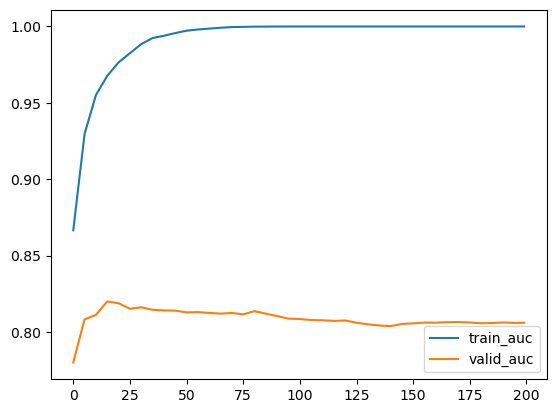

In [69]:
plt.plot(df_score_x.num_iterations , df_score_x.train_auc , label='train_auc')
plt.plot(df_score_x.num_iterations , df_score_x.valid_auc , label='valid_auc')
plt.legend()

In [81]:


key = 'eta=%s' % (xgb_params['eta'])
score_xgb[key] = parse(output)
key

'eta=1.0'

In [ ]:
key = 'max_depth=%s' % (xgb_params['max_depth'])
score_xgb_depth[key] = parse(output)
key

In [80]:
score_xgb

{'eta=0.3':     num_iterations  train_auc  valid_auc
 0                0    0.86653    0.77999
 1                5    0.92969    0.80822
 2               10    0.95512    0.81115
 3               15    0.96767    0.81993
 4               20    0.97648    0.81877
 5               25    0.98248    0.81520
 6               30    0.98844    0.81613
 7               35    0.99244    0.81453
 8               40    0.99393    0.81407
 9               45    0.99568    0.81392
 10              50    0.99723    0.81276
 11              55    0.99804    0.81299
 12              60    0.99861    0.81244
 13              65    0.99916    0.81197
 14              70    0.99962    0.81243
 15              75    0.99975    0.81152
 16              80    0.99989    0.81359
 17              85    0.99993    0.81193
 18              90    0.99998    0.81038
 19              95    0.99999    0.80871
 20             100    0.99999    0.80842
 21             105    1.00000    0.80778
 22             110    

In [71]:
y_pred = model.predict(dvalid)

In [72]:
roc_auc_score(y_valid , y_pred)

np.float64(0.8060200770143614)

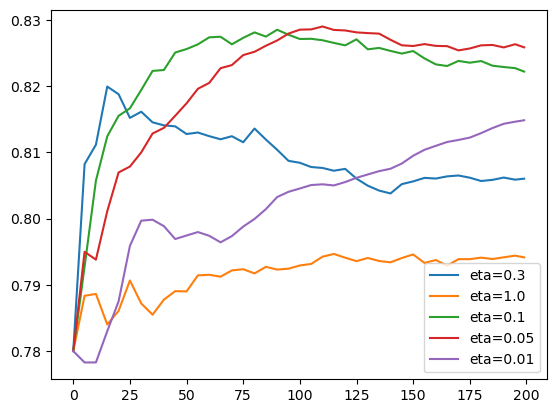

In [89]:
for key,df_score_x in score_xgb.items():
    plt.plot(df_score_x.num_iterations , df_score_x.valid_auc , label=key)
    
    
plt.legend()

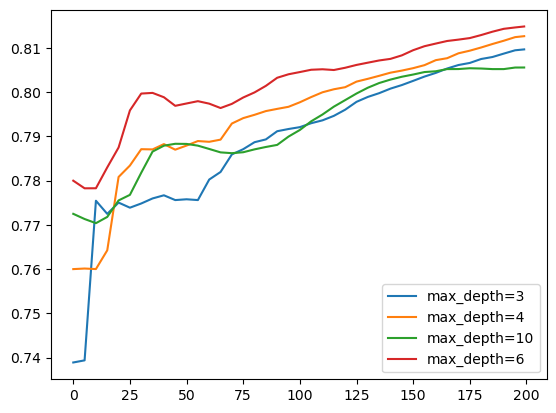

In [104]:
for key,df_score_x in score_xgb_depth.items():
    plt.plot(df_score_x.num_iterations , df_score_x.valid_auc , label=key)
    
    
plt.legend()

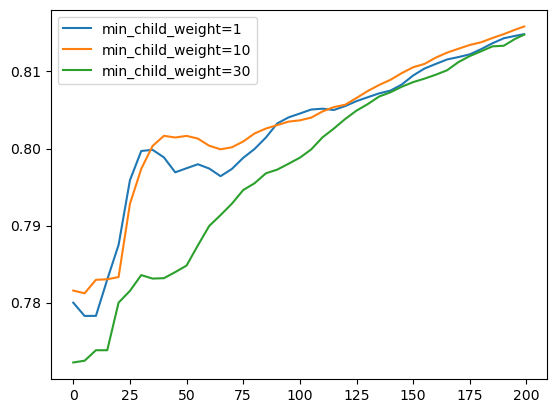

In [112]:
for key,df_score_x in score_xgb_child.items():
    plt.plot(df_score_x.num_iterations , df_score_x.valid_auc , label=key)
    
    
plt.legend()

In [ ]:
%%capture output

xgb_params = {
    'eta' : 0.05,
    'max_depth' : 6,
    'min_child_weight' : 10,
    'objective' : 'binary:logistic',
    'nthread' : 8,
    'seed' : 1,
    'verbosity' : 1,
    'eval_metric' : 'auc',
}
watchlist = [(dtrain , 'train') , (dvalid , 'valid')]
model = xgb.train(xgb_params, dtrain,evals=watchlist,verbose_eval=5, num_boost_round=200)
model

# 6.9 Selecting the best model

In [113]:
dt = DecisionTreeClassifier(max_depth=6 , min_samples_leaf=10 )
dt.fit(X_train , y_train)
dt

DecisionTreeClassifier(max_depth=6, min_samples_leaf=10)

In [114]:
rf = RandomForestClassifier(n_estimators=200 , max_depth=15, min_samples_leaf=1,random_state=1)
rf.fit(X_train,y_train)
rf

RandomForestClassifier(max_depth=15, n_estimators=200, random_state=1)

In [115]:
xgb_params = {
    'eta' : 0.05,
    'max_depth' : 6,
    'min_child_weight' : 10,
    'objective' : 'binary:logistic',
    'nthread' : 8,
    'seed' : 1,
    'verbosity' : 1,
    'eval_metric' : 'auc',
}
watchlist = [(dtrain , 'train') , (dvalid , 'valid')]
model = xgb.train(xgb_params, dtrain,evals=watchlist,verbose_eval=5, num_boost_round=200)
model

[0]	train-auc:0.84318	valid-auc:0.78156
[5]	train-auc:0.86195	valid-auc:0.79463
[10]	train-auc:0.87304	valid-auc:0.80163
[15]	train-auc:0.87870	valid-auc:0.80208
[20]	train-auc:0.88488	valid-auc:0.80567
[25]	train-auc:0.88991	valid-auc:0.80914
[30]	train-auc:0.89636	valid-auc:0.81212
[35]	train-auc:0.90041	valid-auc:0.81468
[40]	train-auc:0.90471	valid-auc:0.81702
[45]	train-auc:0.90783	valid-auc:0.81863
[50]	train-auc:0.91130	valid-auc:0.82024
[55]	train-auc:0.91300	valid-auc:0.82144
[60]	train-auc:0.91462	valid-auc:0.82351
[65]	train-auc:0.91683	valid-auc:0.82436
[70]	train-auc:0.91860	valid-auc:0.82606
[75]	train-auc:0.92021	valid-auc:0.82668
[80]	train-auc:0.92246	valid-auc:0.82689
[85]	train-auc:0.92385	valid-auc:0.82801
[90]	train-auc:0.92530	valid-auc:0.82914
[95]	train-auc:0.92714	valid-auc:0.83001
[100]	train-auc:0.92819	valid-auc:0.82982
[105]	train-auc:0.92931	valid-auc:0.83055
[110]	train-auc:0.93041	valid-auc:0.83072
[115]	train-auc:0.93191	valid-auc:0.83107
[120]	train-au

In [120]:
y_pred_dt = dt.predict_proba(X_valid)[:, 1]
y_pred_rf = rf.predict_proba(X_valid)[:, 1]
y_pred_xgb = model.predict(dvalid)

dt_score = roc_auc_score(y_valid , y_pred_dt)
rf_score =roc_auc_score(y_valid , y_pred_rf)
xgb_score =roc_auc_score(y_valid , y_pred_xgb)
dt_score, rf_score , xgb_score

(np.float64(0.7782991450921508),
 np.float64(0.8200909399142671),
 np.float64(0.8311708362597177))

In [121]:
full_train_data = full_train_data.reset_index(drop=True)
y_full_train = (full_train_data.status == 'default').astype(int).values
del full_train_data['status']

In [125]:
dicts_full_train = full_train_data.fillna(0).to_dict(orient='records')
X_full_train = dv.fit_transform(dicts_full_train)

dicts_test = test_data.fillna(0).to_dict(orient='records')
X_test = dv.transform(dicts_test)

In [129]:
dicts_full_train = xgb.DMatrix(X_full_train , label=y_full_train , feature_names=dv.get_feature_names_out().tolist())
dtest = xgb.DMatrix(X_test , feature_names=dv.get_feature_names_out().tolist())

In [130]:
xgb_params = {
    'eta' : 0.05,
    'max_depth' : 6,
    'min_child_weight' : 10,
    'objective' : 'binary:logistic',
    'nthread' : 8,
    'seed' : 1,
    'verbosity' : 1,
    'eval_metric' : 'auc',
}
watchlist = [(dicts_full_train , 'train') , (dicts_test , 'valid')]
model = xgb.train(xgb_params, dicts_full_train,evals=watchlist,verbose_eval=5, num_boost_round=175)
model

[0]	train-auc:0.83415	valid-auc:nan
[5]	train-auc:0.85701	valid-auc:nan
[10]	train-auc:0.86458	valid-auc:nan
[15]	train-auc:0.87146	valid-auc:nan
[20]	train-auc:0.87849	valid-auc:nan
[25]	train-auc:0.88478	valid-auc:nan
[30]	train-auc:0.88927	valid-auc:nan
[35]	train-auc:0.89331	valid-auc:nan
[40]	train-auc:0.89644	valid-auc:nan
[45]	train-auc:0.90009	valid-auc:nan
[50]	train-auc:0.90230	valid-auc:nan
[55]	train-auc:0.90447	valid-auc:nan
[60]	train-auc:0.90636	valid-auc:nan
[65]	train-auc:0.90846	valid-auc:nan
[70]	train-auc:0.91075	valid-auc:nan
[75]	train-auc:0.91260	valid-auc:nan
[80]	train-auc:0.91488	valid-auc:nan
[85]	train-auc:0.91629	valid-auc:nan
[90]	train-auc:0.91824	valid-auc:nan
[95]	train-auc:0.91971	valid-auc:nan
[100]	train-auc:0.92144	valid-auc:nan
[105]	train-auc:0.92262	valid-auc:nan
[110]	train-auc:0.92406	valid-auc:nan
[115]	train-auc:0.92520	valid-auc:nan
[120]	train-auc:0.92684	valid-auc:nan
[125]	train-auc:0.92785	valid-auc:nan
[130]	train-auc:0.92937	valid-auc:

c:\Users\Ayush\anaconda3\envs\ds_genai\lib\site-packages\xgboost\callback.py:266: UserWarning: [20:11:21] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\metric\auc.cc:324: Dataset is empty, or contains only positive or negative samples.
  score: str = model.eval_set(evals, epoch, self.metric, self._output_margin)


[160]	train-auc:0.93412	valid-auc:nan
[165]	train-auc:0.93489	valid-auc:nan
[170]	train-auc:0.93565	valid-auc:nan
[174]	train-auc:0.93625	valid-auc:nan


In [132]:
y_pred = model.predict(dtest)
roc_auc_score(y_test , y_pred)

np.float64(0.8283380577684374)